#Practice Case - EDA
Stella Linda Cyrilla

## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing

## Load dataset in CSV format from URL

In [ ]:
url="https://raw.githubusercontent.com/Syukrondzeko/Fellowship/main/epl_1819.csv"

#download the csv file from URL and create the dataframe
df=pd.read_csv(url)
df.head(5)

,Team,category,general_league_position,finance _live_games_televised,finance _tv_revenue,general_matches_played,general_won,general_draw,general_lost,attack_scored,defence_goals_conceeded,general_goal_difference,general_points,general_squad_size,general_squad_average_age,general_squad_foreigners,finance _team_market,finance _market_average,attack_passes,attack_passes_through,attack_passes_long,attack_passes_back,attack_crosses,attack_corners_taken,attack_shots,attack_shots_on_target,attack_goals_headed,attack_goals_penalty,attack_goals_box,attack_goals_outsidebox,general_card_yellow,general_card_red,attack_goals_counter,attack_goals_freekick,defence_saves,defence_blocks,defence_interceptions,defence_tackles,defence_tackles_last_man,defence_clearances,defence_clearances_headed,defence_penalty_conceeded,attack_posession,attack_pass_accuracy
0,Manchester City,Champions League,1,26,150986355,38,32,2,4,95,23,72,98,25,27.1,20,1003200000,39987200,"26,581",112,"1,814","4,240",783,298,683,260,12,3,80,15,44,1,5,2,58,63,362,518,0,543,295,4,64.0,89.0
1,Liverpool,Champions League,2,29,152425146,38,30,7,1,89,22,67,97,24,26.8,16,836440000,34848000,"23,638",98,"2,250","3,416",721,249,575,226,19,7,84,5,38,2,6,1,76,78,314,610,2,639,317,1,58.8,84.4
2,Chelsea,Champions League Qualification,3,25,146030216,38,21,9,8,63,39,24,72,26,28.1,19,779460000,29981600,"25,070",146,"1,774","3,874",692,215,607,198,8,5,54,9,49,0,1,1,85,73,351,618,2,593,330,2,59.9,87.6
3,Tottenham,Champions League Qualification,4,26,145230801,38,23,2,13,67,39,28,71,25,27.0,17,735240000,29409600,"21,295",87,"2,267","3,191",643,194,537,189,14,4,53,14,56,3,5,2,121,112,326,626,3,770,411,5,56.7,83.2
4,Arsenal,Europa League,5,25,142193180,38,21,7,10,73,51,22,70,26,27.5,18,701800000,26989600,"20,805",65,"2,062","3,102",605,209,467,170,5,4,62,11,72,2,3,3,133,118,412,609,2,762,404,7,56.1,83.3


## 1.Is this data clean? 

In [ ]:
#check if there is any column that contains missing (NaN) value
print("column with missing value(s): ",df.columns[df.isna().any()].tolist(),'\n')

column with missing value(s):  [] 



In [ ]:
#check team data
print('\nNumber of rows based on each Team name: ')
df.Team.value_counts()


Number of rows based on each Team name: 


Southampton          1
Brighton             1
Crystal Palace       1
Chelsea              1
Watford              1
Fulham               1
Manchester City      1
West Ham             1
Huddersfield         1
Wolverhampton        1
Everton              1
Tottenham            1
Cardiff              1
Arsenal              1
Manchester United    1
Newcastle            1
Burnley              1
Liverpool            1
 Bournemouth         1
Leicester            1
Name: Team, dtype: int64

In [ ]:
#check the data types
df.dtypes

Team                              object
category                          object
general_league_position            int64
finance _live_games_televised      int64
finance _tv_revenue                int64
general_matches_played             int64
general_won                        int64
general_draw                       int64
general_lost                       int64
attack_scored                      int64
defence_goals_conceeded            int64
general_goal_difference            int64
general_points                     int64
general_squad_size                 int64
general_squad_average_age        float64
general_squad_foreigners           int64
finance _team_market               int64
finance _market_average            int64
attack_passes                     object
attack_passes_through              int64
attack_passes_long                object
attack_passes_back                object
attack_crosses                     int64
attack_corners_taken               int64
attack_shots    

1. There isn't any missing value and duplicate from the dataset. 
2. But, we could see that some columns which contain integer values are classified into object datatypes (attack_passes, attack_passes_long, attack_passes_back, defence_clearances).
Therefore, we could say that the data isn't fully clean.

We'll convert these columns into int64 datatypes

In [188]:
columnToReplace = ['attack_passes', 'attack_passes_long' , 'attack_passes_back','defence_clearances']
df[columnToReplace] = df[columnToReplace].replace(',','', regex=True)

convert_dict = {'attack_passes': int,
                'attack_passes_long' : int, 'attack_passes_back' : int,'defence_clearances':int
              }
  
df = df.astype(convert_dict)
print(df.dtypes)

Team                              object
category                          object
general_league_position            int64
finance _live_games_televised      int64
finance _tv_revenue                int64
general_matches_played             int64
general_won                        int64
general_draw                       int64
general_lost                       int64
attack_scored                      int64
defence_goals_conceeded            int64
general_goal_difference            int64
general_points                     int64
general_squad_size                 int64
general_squad_average_age        float64
general_squad_foreigners           int64
finance _team_market               int64
finance _market_average            int64
attack_passes                      int64
attack_passes_through              int64
attack_passes_long                 int64
attack_passes_back                 int64
attack_crosses                     int64
attack_corners_taken               int64
attack_shots    

## 2.	How is the point distribution of the epl team? and which team is an anomaly?

Text(0.5, 0, 'general_points')

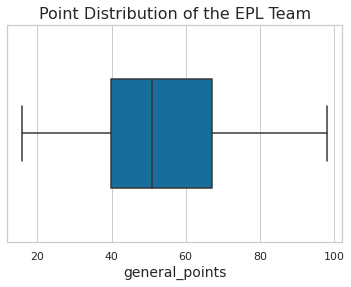

In [189]:
#Create the boxplot to see the point (general_points) distribution
sns.set_theme(style="whitegrid")
bplot = sns.boxplot(x='general_points', 
                 data=df,
                 width=0.5,
                 palette="colorblind")

bplot.axes.set_title("Point Distribution of the EPL Team",
                    fontsize=16)
bplot.set_xlabel("general_points",
                fontsize=14)

In [ ]:
#Find the data summary
print("General Points Data Summary")
df['general_points'].describe()

count    20.000000
mean     53.450000
std      21.007455
min      16.000000
25%      39.750000
50%      51.000000
75%      67.000000
max      98.000000
Name: general_points, dtype: float64

## 3.	Which team has the best attack? 

To find the team with best attack, we'll calculate the mean fromn all columns with attack aspects. Since each column have different value ranges, we should normalize the each column value that will be used. By normalizing, all of these columns can give same proportions into the mean calculation.

In [ ]:
#list the column name that would be used in attack mean calculation
atk = ['attack_scored', 'attack_passes',
                   'attack_passes_through','attack_passes_long',
                   'attack_passes_back','attack_crosses',
                   'attack_crosses','attack_corners_taken', 
                   'attack_shots','attack_shots_on_target', 
                   'attack_goals_headed','attack_goals_penalty', 
                   'attack_goals_box','attack_goals_outsidebox', 
                   'attack_goals_counter','attack_goals_freekick','attack_posession','attack_pass_accuracy']

In [192]:
#make a copied dataframe (df_atk) so the original df doesn't change
df_atk = df.copy(deep=True)
df_atk[atk] = df_atk[atk].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

#create a new column named overall_atk that contains mean value of the attack aspects
df_atk['overall_atk'] = df_atk[atk].mean(axis=1)
df_atk=df_atk.sort_values(by=['overall_atk'],ascending=False).reset_index(drop=True)
df_atk

#find the team that has the highest 'overall_atk'
best_atk = df_atk[df_atk['overall_atk']== df_atk['overall_atk'].max()]
best_atk[['Team','overall_atk']]

,Team,overall_atk
0,Manchester City,0.802672


## 4.	Which team has the best defence? 

In [ ]:
#similar steps with question no. 3
defence = ['defence_saves','defence_blocks','defence_interceptions','defence_tackles','defence_tackles_last_man','defence_clearances',
           'defence_clearances_headed','defence_penalty_conceeded']
defence

['defence_saves',
 'defence_blocks',
 'defence_interceptions',
 'defence_tackles',
 'defence_tackles_last_man',
 'defence_clearances',
 'defence_clearances_headed',
 'defence_penalty_conceeded']

In [209]:
#make a copied dataframe (df_def) so the original df doesn't change
df_def = df.copy(deep=True)
df_def[defence] = df_def[defence].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

#create a new column named overall_def that contains mean value of the defence aspects
df_def['overall_def'] = df_def[defence].mean(axis=1)
df_def=df_def.sort_values(by=['overall_def'],ascending=False).reset_index(drop=True)
df_def

#find the team that has the highest 'overall_atk'
best_def = df_def[df_def['overall_def']== df_def['overall_def'].max()]
best_def[['Team','overall_def']]

,Team,overall_def
0,Newcastle,0.72117


## 5.	Which team is good in the financial aspect? 

In [211]:
#similar steps with question no. 3 and 4
fin = ['finance _tv_revenue','finance _team_market','finance _market_average']

#make a copied dataframe (df_def) so the original df doesn't change
df_fin = df.copy(deep=True)

#create a new column named overall_fin that contains mean value of the financial aspects
df_fin['overall_fin'] = df_fin[fin].mean(axis=1)
df_fin=df_fin.sort_values(by=['overall_fin'],ascending=False).reset_index(drop=True)
df_fin['overall_fin'] = df_fin['overall_fin'].astype('int64')
df_fin

#find the team that has the highest 'overall_atk'
df_fin = df_fin.sort_values(by=['overall_fin'],ascending=False).reset_index(drop=True)
best_fin=df_fin[['Team','overall_fin']]
best_fin.head(5)

,Team,overall_fin
0,Manchester City,398057851
1,Liverpool,341237715
2,Chelsea,318490605
3,Tottenham,303293467
4,Arsenal,290327593


## 6. Other Thought

Liverpool is a worth-to-invest team, since they have higher TV revenue from the Manchester City with cheaper finance team market price.

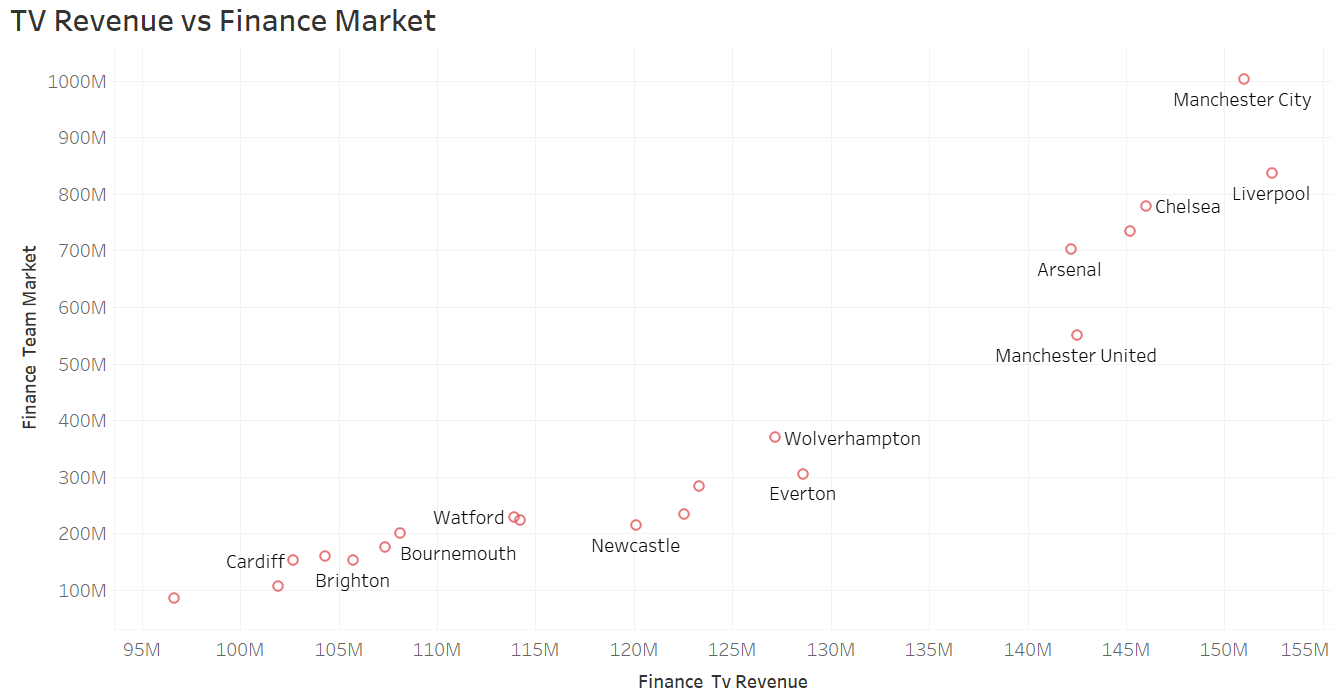